In [1]:
# See https://www.datacamp.com/community/blog/jupyter-notebook-r
library(Rodam)
library(UpSetR)


Loading required package: RCurl
Loading required package: bitops
Warning message:
"package 'UpSetR' was built under R version 3.5.3"

In [2]:
# Initialize the 'ODAM' object
dh <- new('odamws', wsURL='https://pmb-bordeaux.fr/getdata/', dsname='frim1')

# List of data subsets
setNameList <- c('activome', 'plato_hexosesP', 
                 'AminoAcid', 'qMS_metabo', 
                 'qNMR_metabo', 'cellwall_metabo', 
                 'lipids_AG' )


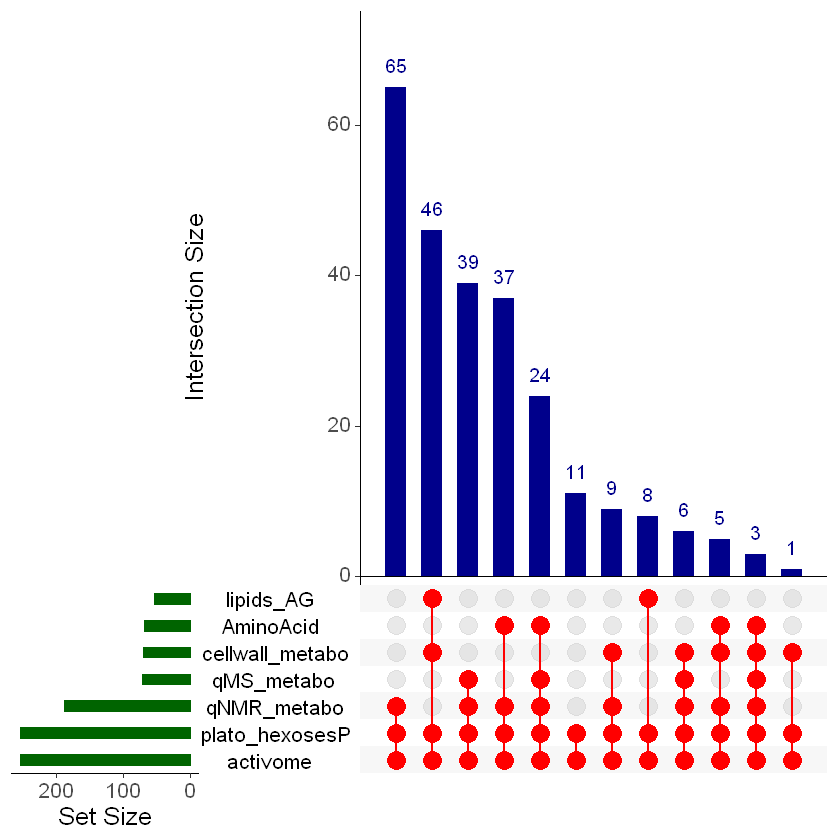

In [3]:
# Get the UpSet Table
upset.table <- dh$getUpSetTable(setNameList)

# Plot the UpSet Graphic
# See https://www.rdocumentation.org/packages/UpSetR/versions/1.3.3/topics/upset
upset(upset.table, sets = setNameList, order.by = "freq",
           point.size=5, text.scale=1.8, 
           matrix.col="red", main.bar.color="darkblue", sets.bar.color="darkgreen")


In [4]:
## Compare two levels of the same factor
library(dendextend)



---------------------
Welcome to dendextend version 1.8.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



In [5]:
setNameList <- c("activome", "qNMR_metabo" )
dsMerged <- dh$getSubsetByName(setNameList)

treatmentL1 <- unique(dsMerged$data[, "Treatment"])[1] # Control
treatmentL2 <- unique(dsMerged$data[, "Treatment"])[2] # Shaded

VarnamesS1 <- dsMerged$varsBySubset[[setNameList[1]]]
VarnamesS2 <- dsMerged$varsBySubset[[setNameList[2]]]

subdata1 <- dsMerged$data[dsMerged$data[, "Treatment"]==treatmentL1, ]
subdata1 <- log2(subdata1[ , c(VarnamesS1, VarnamesS2)])

subdata2 <- dsMerged$data[dsMerged$data[, "Treatment"]==treatmentL2, ]
subdata2 <- log2(subdata2[, c(VarnamesS1, VarnamesS2)])


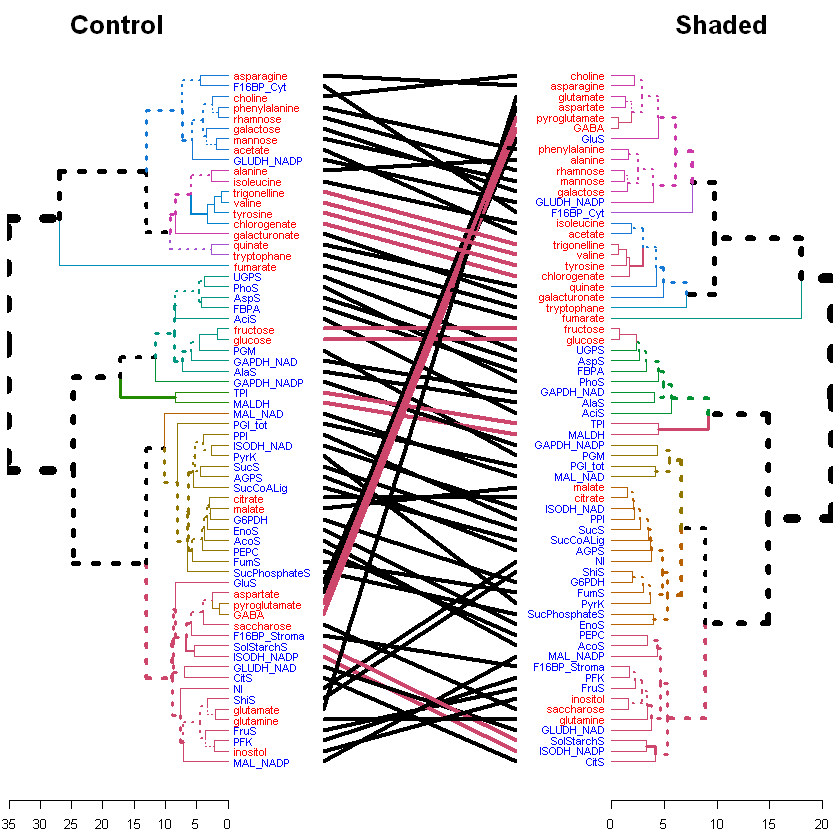

In [6]:
# Dendrogram 1 : Activome + qNMR_metab for Treatment=Control
dend_01 <- t(subdata1) %>%  scale %>% dist %>% hclust(method = "average") %>% as.dendrogram
cols <- rep( 'red', length(dend_01 %>% labels))
cols[ dend_01 %>% labels %in% VarnamesS1 ] <- 'blue'
dend_01 <- dend_01 %>% set("branches_k_color", k = 10) %>% 
                       set("labels_colors", cols) %>% set("labels_cex", 0.8)

# Dendrogram 1 : Activome + qNMR_metab for Treatment=WaterStress
dend_02 <- t(subdata2) %>% scale %>% dist %>% hclust(method = "average") %>% as.dendrogram
cols <- rep( 'red', length(dend_02 %>% labels))
cols[ dend_02 %>% labels %in% VarnamesS1 ] <- 'blue'
dend_02 <- dend_02 %>% set("branches_k_color", k = 10) %>% 
                       set("labels_colors", cols) %>% set("labels_cex", 0.8)

# set bottom, left, top and right margins 
par(mar=c(2,1,1,8))

# Comparing two dendrograms
dend12 <- dendlist(dend_01, dend_02)
dend12 %>% untangle(method = "step1side") %>% 
      tanglegram(common_subtrees_color_branches = TRUE, margin_inner=6, 
      main_left=treatmentL1, main_right=treatmentL2, cex_main=2)


In [7]:
sessionInfo()


R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18362)

Matrix products: default

locale:
[1] LC_COLLATE=French_France.1252  LC_CTYPE=French_France.1252   
[3] LC_MONETARY=French_France.1252 LC_NUMERIC=C                  
[5] LC_TIME=French_France.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dendextend_1.8.0 UpSetR_1.3.3     Rodam_0.1.6      RCurl_1.95-4.11 
[5] bitops_1.0-6    

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3         modeltools_0.2-22    tidyselect_0.2.5    
 [4] repr_1.0.1           kernlab_0.9-27       purrr_0.2.5         
 [7] lattice_0.20-35      colorspace_1.3-2     viridisLite_0.3.0   
[10] htmltools_0.3.6      stats4_3.5.1         base64enc_0.1-3     
[13] rlang_0.4.0          pillar_1.4.2         glue_1.3.1          
[16] prabclus_2.2-6       fpc_2.1-11.1         uuid_0.1-2          
[19] plyr_1.8